In [1]:
!pip install basemap
!pip install basemap-data-hires
!pip install adjustText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
nz_lats = [-34.25, -36.75, -37.25, -37.75, -38.75, -40.75, -41.25, -43.75, -43.75, -44.25, -45.75, -47.25]
nz_lons = [172.25, 175.25, 176.75, 174.75, 174.25, 174.25, 176.25, 183.25, 173.25, 167.25, 170.75, 167.75]
nz_locs = ['Cape Reinga', 'Hauraki Gulf', 'Bay of Plenty', 'Raglan', 'Taranaki', 'Cook Strait', 'Wairarapa', 
           'Chatham Island', 'Bank Peninsula', 'Fiordland', 'Otago Peninsula', 'Stewart Island']
nz_sstas = ['1, 2, 3', '1, 2, 3, 6', '1, 2, 3, 6', '1, 2, 6', '1, 2, 3, 6', '1, 2, 3, 6', '1, 2, 3, 6', '1, 2, 3, 6', '1, 2, 3, 6', '1, 2, 3, 6', '2, 3', '2, 3, 6']
nz_mhws = ['2, 3, 6', '1, 2, 3, 6', '1, 2, 3, 6', 'NA', '3', '1, 2, 3', 'NA', '1, 2, 3, 6', 'NA', '1, 2, 3, 6', '1, 2, 3', '1']
nz_smhws = ['1, 6', '1, 2, 3, 6', '2, 3, 6', '6', '3, 6', '1, 2, 3, 6', '1, 2', '1, 2, 3, 6', '6', '1, 2, 3', '1, 2, 3', '1, 2']
nz_right = [False, False, True, True, False, False, True, True, True, False, True, True]

non_nz_lats = [-29.25, -36.25, -38.25, -40.25, -33.75, -33.75, -35.25, -35.25]
non_nz_lons = [155.75, 152.75, 150.75, 150.75, 203.25, 200.25, 207.25, 204.25] 
non_nz_locs = ['EAC A', 'EAC B', 'EAC C', 'EAC D', 'CP A', 'CP B', 'CP C', 'CP D']

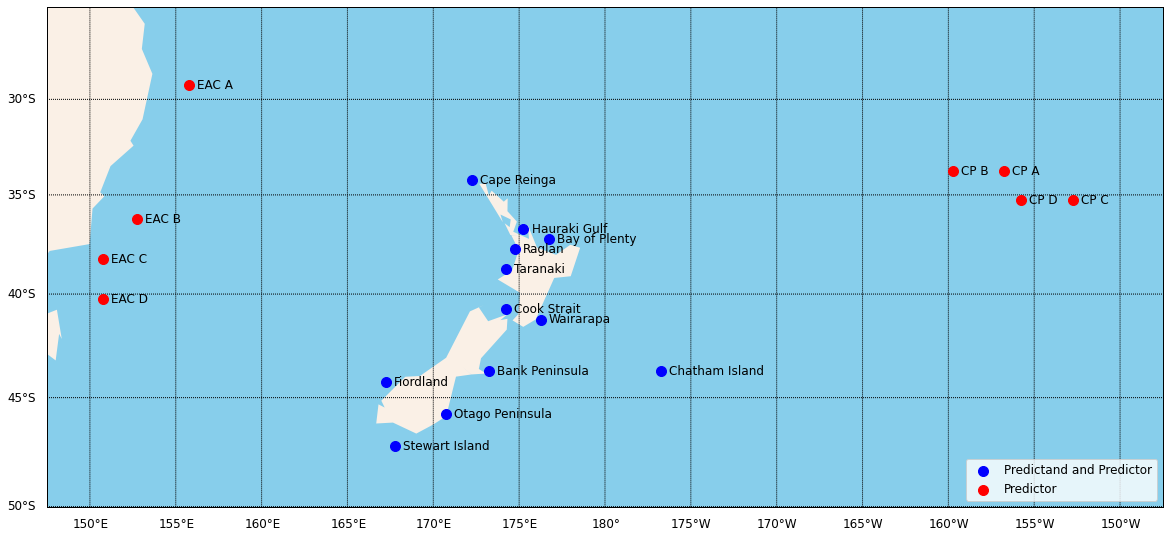

In [3]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))
m = Basemap(projection='mill', lon_0=180,
            llcrnrlon=147.5, llcrnrlat=-50, urcrnrlon=212.5, urcrnrlat=-25)

#m.drawcoastlines()
m.drawcountries()
m.drawparallels(range(-90, 91, 5), labels=[1, 0, 0, 0], fontsize=12)
m.drawmeridians(range(0, 360, 5), labels=[0, 0, 0, 1], fontsize=12)
m.drawmapboundary(fill_color='skyblue')
m.fillcontinents(color='linen', lake_color='skyblue')

sc1 = plt.scatter([], [], s=100, marker='o', color='blue')
sc2 = plt.scatter([], [], s=100, marker='o', color='red')

for lat, lon, loc in zip(nz_lats, nz_lons, nz_locs):
    x, y = m(lon, lat)
    plt.plot(x, y, 'bo', markersize=10)
    plt.text(x + 52500, y, loc, fontsize=12, color='black', ha='left', va='center')

for lat, lon, loc in zip(non_nz_lats, non_nz_lons, non_nz_locs):
    x, y = m(lon, lat)
    plt.plot(x, y, 'ro', markersize=10)
    plt.text(x + 52500, y, loc, fontsize=12, color='black', ha='left', va='center')

plt.legend([sc1, sc2], ['Predictand and Predictor', 'Predictor'], loc='lower right', fontsize=12)

plt.show()

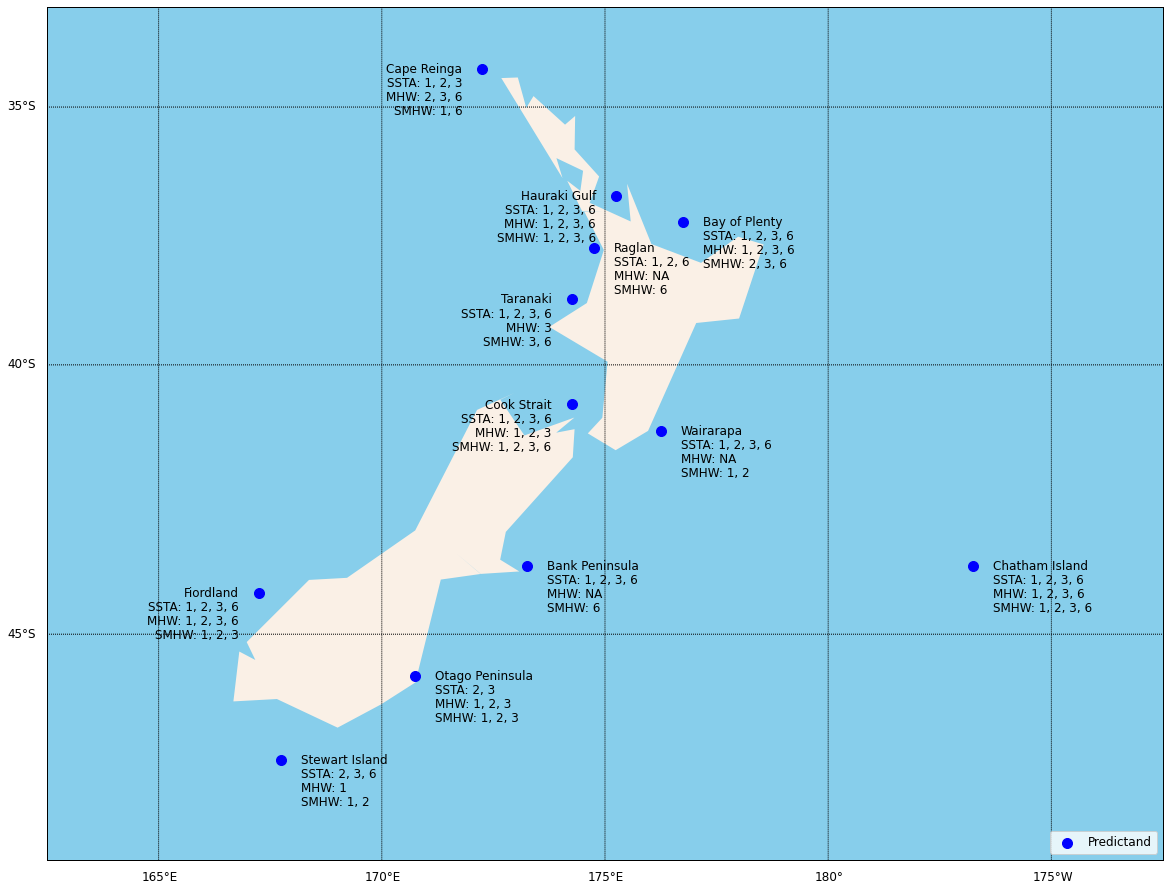

In [4]:
fig, ax = plt.subplots(figsize=(20, 20))
m = Basemap(projection='mill', lon_0=180,
            llcrnrlon=162.5, llcrnrlat=-49, urcrnrlon=187.5, urcrnrlat=-33)

#m.drawcoastlines()
m.drawcountries()
m.drawparallels(range(-90, 91, 5), labels=[1, 0, 0, 0], fontsize=12)
m.drawmeridians(range(0, 360, 5), labels=[0, 0, 0, 1], fontsize=12)
m.drawmapboundary(fill_color='skyblue')
m.fillcontinents(color='linen', lake_color='skyblue')

sc1 = plt.scatter([], [], s=100, marker='o', color='blue')

for lat, lon, loc, ssta, mhw, smhw, right in zip(nz_lats, nz_lons, nz_locs, nz_sstas, nz_mhws, nz_smhws, nz_right):
    if right:
        x, y = m(lon, lat)
        plt.plot(x, y, 'bo', markersize=10)
        plt.text(x + 50000, y , loc, fontsize=12, color='black', ha='left', va='center')
        plt.text(x + 50000, y - 35000, 'SSTA: ' + ssta, fontsize=12, color='black', ha='left', va='center')
        plt.text(x + 50000, y - 70000, 'MHW: ' + mhw, fontsize=12, color='black', ha='left', va='center')
        plt.text(x + 50000, y - 105000, 'SMHW: ' + smhw, fontsize=12, color='black', ha='left', va='center')
    else:
        x, y = m(lon, lat)
        plt.plot(x, y, 'bo', markersize=10)
        plt.text(x - 50000, y , loc, fontsize=12, color='black', ha='right', va='center')
        plt.text(x - 50000, y - 35000, 'SSTA: ' + ssta, fontsize=12, color='black', ha='right', va='center')
        plt.text(x - 50000, y - 70000, 'MHW: ' + mhw, fontsize=12, color='black', ha='right', va='center')
        plt.text(x - 50000, y - 105000, 'SMHW: ' + smhw, fontsize=12, color='black', ha='right', va='center')

plt.legend([sc1], ['Predictand'], loc='lower right', fontsize=12)

plt.show()